In [1]:
from pathlib import Path
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np


plt.rcParams.update({'font.size': 20})

input_file = Path('~/Ramdisk/0-1.tif').expanduser()
im = Image.open(input_file)

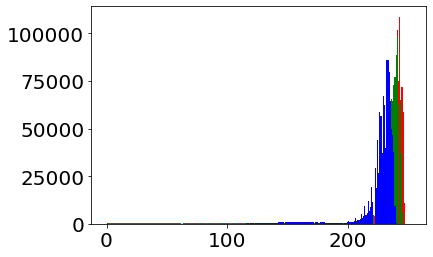

In [2]:
im.convert('RGB')
r, g, b = im.split()
ar = np.asarray(r).flatten()
plt.hist(ar, bins=256, facecolor='red')
ar = np.asarray(g).flatten()
plt.hist(ar, bins=256, facecolor='green')
ar = np.asarray(b).flatten()
plt.hist(ar, bins=256, facecolor='blue')
plt.show()

In [3]:
width, height = b.size
print(width, height)
ref_loc = (750, 225, 775, 250)
empty_loc = (700, 600, 800, 700)
target_loc = (50, 50, int(width/2), height-50)
draw = ImageDraw.Draw(im)
draw.rectangle(ref_loc, outline=(255, 0, 0), width=2)
draw.rectangle(empty_loc, outline=(0, 255, 0), width=2)
draw.rectangle(target_loc, outline=(255, 0, 255), width=2)
im.show()

1038 1026


raw ref (625, 55673, 625, 89.0768, 89.0768)
raw empty (10000, 189941, 0, 18.9941, 0)
raw target (434294, 13919062, 90147, 32.04986023292977, 62.1170199784796)
new ref (625, 43801.6875, 625, 70.0827, 70.0827)
new empty (10000, 4.547473508864641e-12, 0, 4.547473508864641e-16, 0)
new target (434294, 5670038.334599999, 41530, 13.055760232929764, 72.0797020707922)
size, total, area, total_mean, area_mean


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


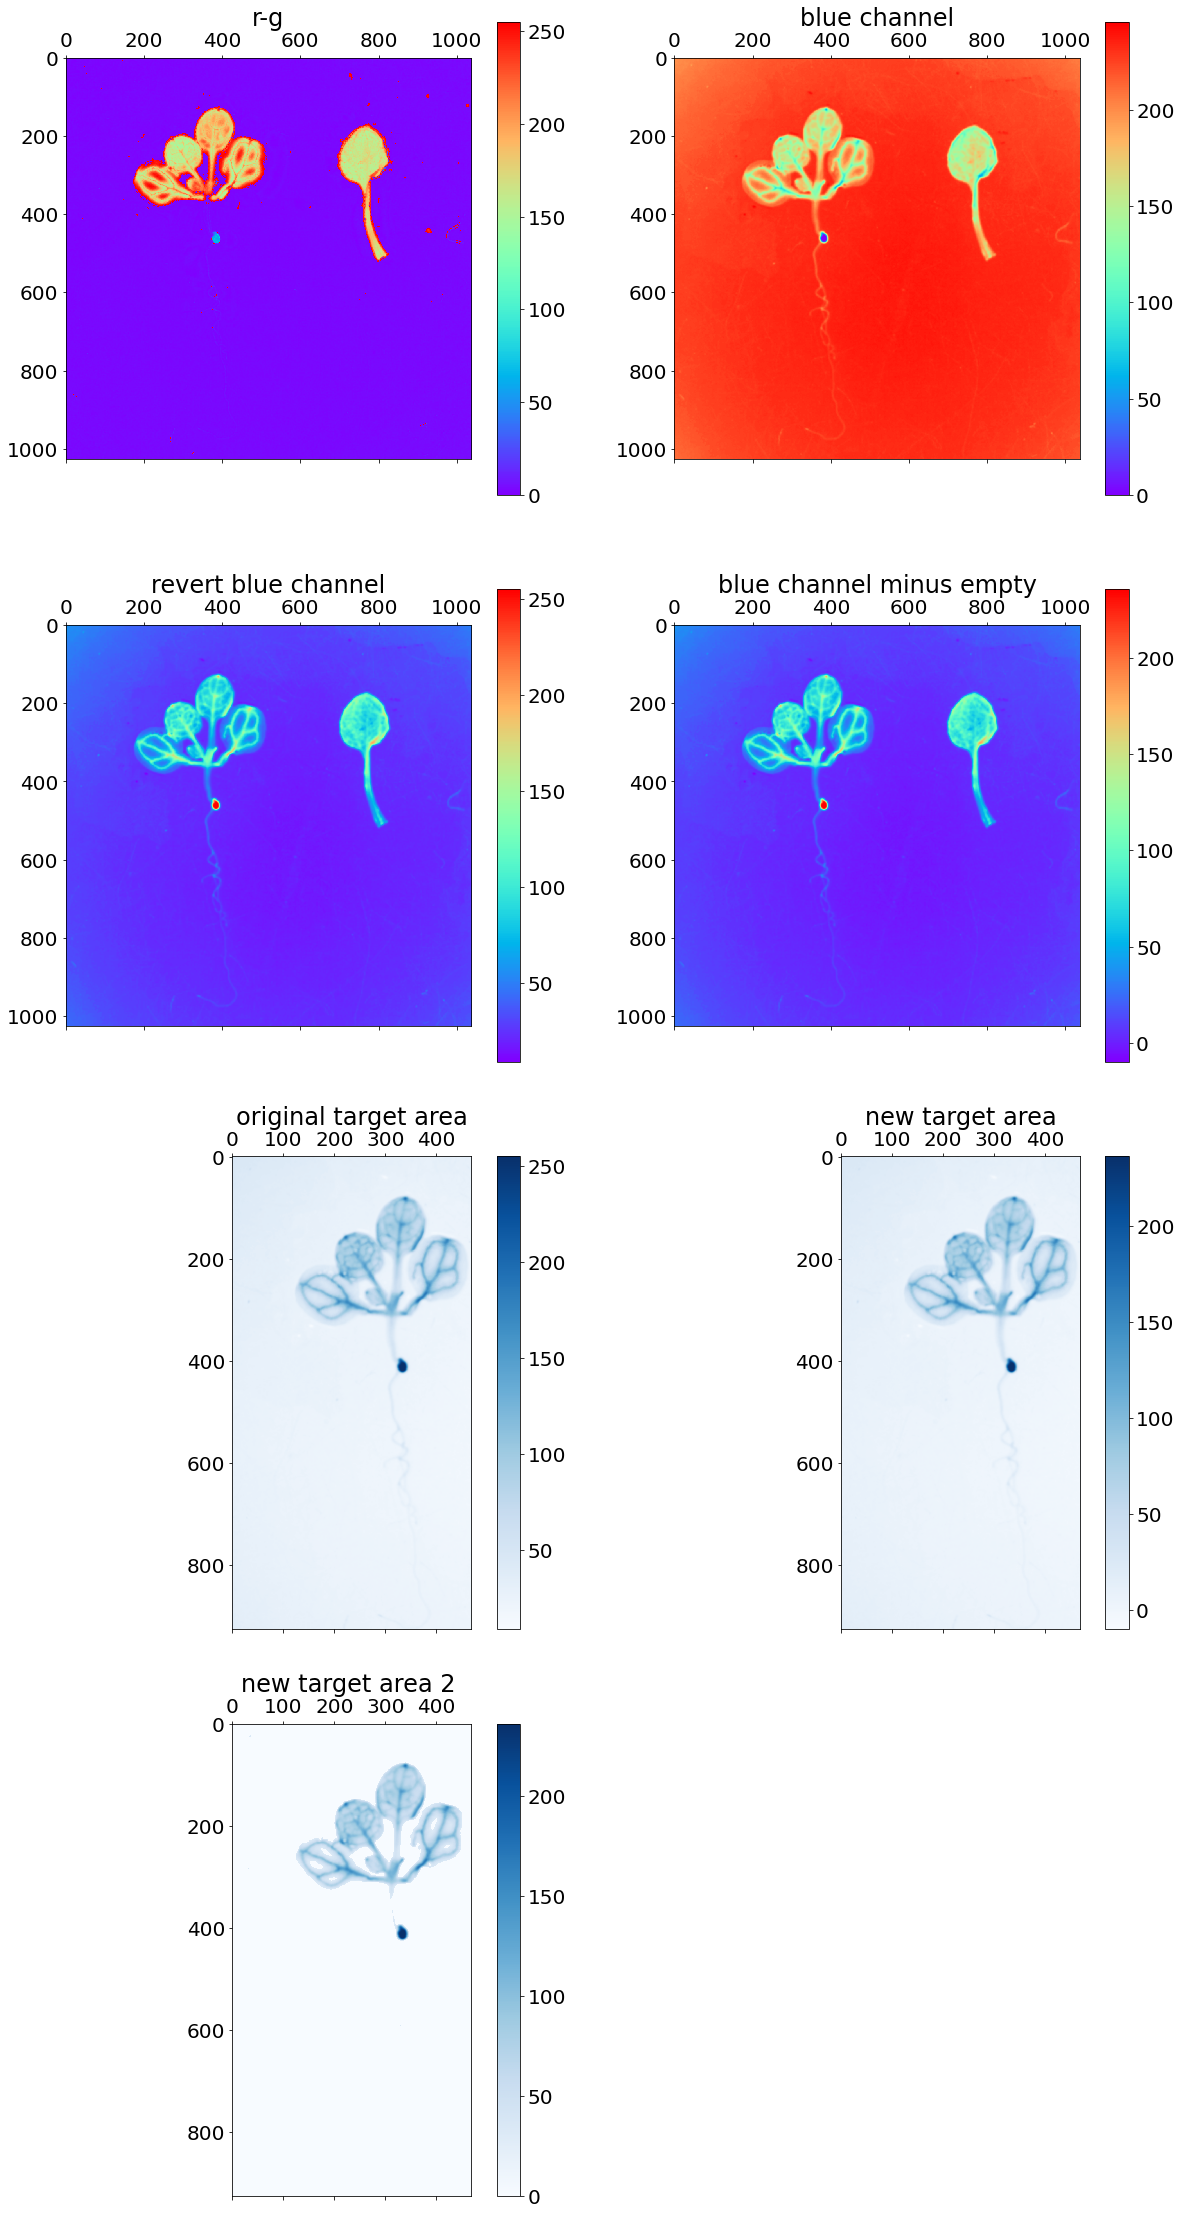

In [4]:
def get_area_array(array, area_loc):
    return array[area_loc[1]:area_loc[3], area_loc[0]:area_loc[2]]
def fill_array(array, area_loc, value):
    array[area_loc[1]:area_loc[3], area_loc[0]:area_loc[2]] = value
    return array
threshold = 32
def calculate(array):
    size = array.size
    total = np.sum(array)
    area = np.count_nonzero(array[array>threshold])
    total_mean = max(0, np.mean(array))
    area_mean = max(0, np.mean(array[array>threshold]))
    return size, total, area, total_mean, area_mean
fig_n = 1
plt.figure(figsize=(20, 40))
def draw(ar, title='', cmaps=plt.cm.rainbow):
    global fig_n
    ax = plt.subplot(4, 2, fig_n)
    ax.set_title(title)
    m = ax.matshow(ar, cmap=cmaps)
    plt.colorbar(m)
    fig_n += 1
b_ar = np.asarray(b)
r_ar = np.asarray(r)
g_ar = np.asarray(g)
draw(r_ar-g_ar, 'r-g')
draw(b_ar, 'blue channel')
b_ar = 255 - b_ar
draw(b_ar, 'revert blue channel')
# b_ar[b_ar-r_ar<min_b] = 0
ref_b = get_area_array(b_ar, ref_loc)
# x = b_ar.copy()
# x[abs(r_ar-g_ar)<white] = 0
# b_ar = 255 - b_ar
ref_ar = get_area_array(b_ar, ref_loc)
empty_ar = get_area_array(b_ar, empty_loc)
target_ar = get_area_array(b_ar, target_loc)
print('raw ref', calculate(ref_ar))
print('raw empty', calculate(empty_ar))
print('raw target', calculate(target_ar))
b_ar2 = b_ar.copy() - np.mean(empty_ar)
draw(b_ar2, 'blue channel minus empty')
ref_ar2 = get_area_array(b_ar2, ref_loc)
ref_ar2[ref_ar2<threshold] = 0
empty_ar2 = get_area_array(b_ar2, empty_loc)
target_ar2 = get_area_array(b_ar2, target_loc)
print('new ref', calculate(ref_ar2))
print('new empty', calculate(empty_ar2))
print('new target', calculate(target_ar2))
# plt.clim(0, 255)
print('size, total, area, total_mean, area_mean')
draw(target_ar, 'original target area', cmaps=plt.cm.Blues)
draw(target_ar2, 'new target area', cmaps=plt.cm.Blues)
target_ar3 = target_ar2.copy()
target_ar3[target_ar3<threshold] = 0
draw(target_ar3, 'new target area 2 ', cmaps=plt.cm.Blues)
# 

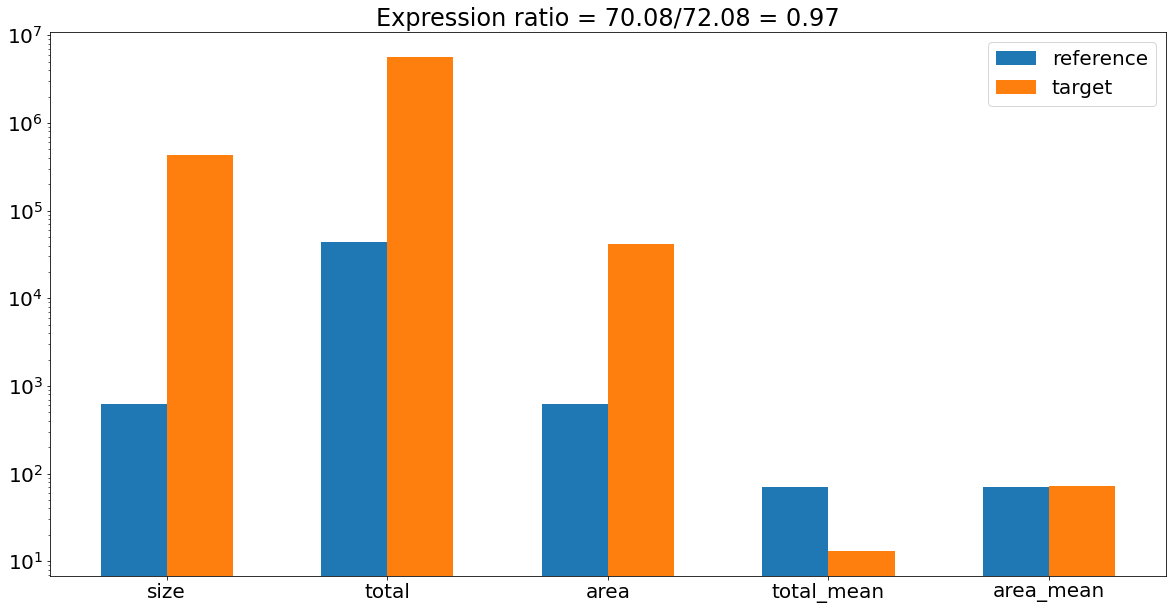

In [5]:
r_ = calculate(ref_ar2)
t_ = calculate(target_ar2)
plt.figure(figsize=(20, 10))
plt.title(f'Expression ratio = {r_[-1]:.2f}/{t_[-1]:.2f} = {r_[-1]/t_[-1]:.2f}')
x = np.arange(len(r_))
plt.bar(x-0.15, r_, width=0.3, label='reference')
plt.bar(x+0.15, t_, width=0.3, label='target')
plt.yscale('log')
labels = 'size, total, area, total_mean, area_mean'.split(', ')
plt.xticks(x, labels)
# plt.hist(target_ar2.flatten(), bins=256, color='blue', label='target')
plt.legend()
plt.show()

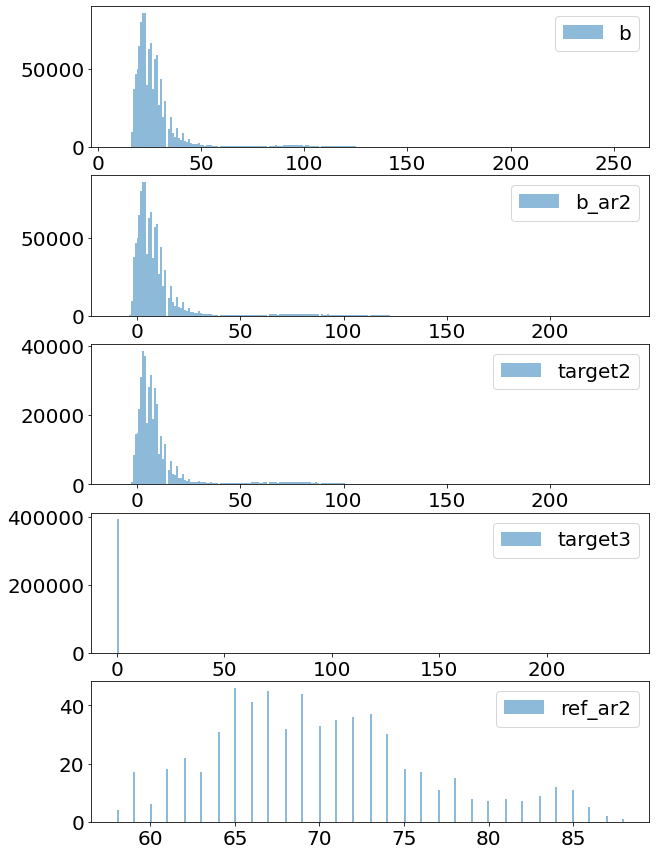

In [6]:
plt.figure(figsize=(10, 15))
ax = plt.subplot(5, 1, 1)
ax.hist(b_ar.flatten(), bins=256, label='b', alpha=0.5)
ax.legend()
ax = plt.subplot(5, 1, 2)
ax.hist(b_ar2.flatten(), bins=256, label='b_ar2', alpha=0.5)
ax.legend()
ax = plt.subplot(5, 1, 3)
ax.hist(target_ar2.flatten(), bins=256, label='target2', alpha=0.5)
ax.legend()
ax = plt.subplot(5, 1, 4)
ax.hist(target_ar3.flatten(), bins=256, label='target3', alpha=0.5)
ax.legend()
ax = plt.subplot(5, 1, 5)
ax.hist(ref_ar2.flatten(), bins=256, label='ref_ar2', alpha=0.5)
ax.legend()
plt.show()

In [6]:
import cv2
from pathlib import Path
input_file = Path('~/Ramdisk/0-1.tif').expanduser()
o = cv2.imread(str(input_file), cv2.IMREAD_GRAYSCALE)
def draw2(image, low, high):
    r = cv2.Canny(image, low, high)
    cv2.imshow(f'{low}-{high}', r)
cv2.imshow('original', o)
thresh = cv2.Canny(o, 16, 200)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(o, contours, -1, (25, 0, 0),2)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(o, (x,y), (x+w, y+h), (255,0,0),2)
cv2.imshow('contours', o)
#draw2(o, 128, 200)
#draw2(o, 32, 128)
#draw2(o, 32, 200)
#draw2(o, 16, 128)
draw2(o, 16, 200)
#cv2.waitKey()
#cv2.destroyAllWindows()